In [48]:
import tensorflow as tf

In [49]:
tf.reset_default_graph()

## Phase 1: assemble a graph

In [50]:
g = tf.Graph()
with g.as_default():
    a = tf.constant(2,name='a')
    print(a.name,a)
    b = tf.constant(3,name='b')
    print(b.name,b)    
    x = tf.add(a,b,name='add')
    print(x.name,x)
    

(u'a:0', <tf.Tensor 'a:0' shape=() dtype=int32>)
(u'b:0', <tf.Tensor 'b:0' shape=() dtype=int32>)
(u'add:0', <tf.Tensor 'add:0' shape=() dtype=int32>)


## Write the graph defination to disk

In [51]:
# write the graph definiation to disk
writer = tf.summary.FileWriter('./graphs_add',g)
print(g.as_graph_def())
writer.close()

node {
  name: "a"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_INT32
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_INT32
        tensor_shape {
        }
        int_val: 2
      }
    }
  }
}
node {
  name: "b"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_INT32
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_INT32
        tensor_shape {
        }
        int_val: 3
      }
    }
  }
}
node {
  name: "add"
  op: "Add"
  input: "a"
  input: "b"
  attr {
    key: "T"
    value {
      type: DT_INT32
    }
  }
}
versions {
  producer: 22
}



# You can visualize the graph in tensorboard
``` tensorboard --logdir graphs_add```

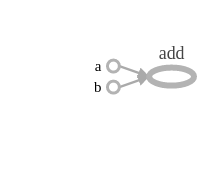

In [52]:
from IPython.display import Image
Image(filename='graphs_add.png')

In [53]:
print(tf.contrib.graph_editor.get_tensors(g))

[<tf.Tensor 'a:0' shape=() dtype=int32>, <tf.Tensor 'b:0' shape=() dtype=int32>, <tf.Tensor 'add:0' shape=() dtype=int32>]


#our node do not append to default graph

```tf.reset_default_graph()``` do not work!

In [68]:
# we show that node is append to the graph step by step.
with tf.Graph().as_default() as new:
    # add node a to graph
    a = tf.placeholder(tf.float32,name='a')
    print(new.as_graph_def())
    # you can visualize it in tensorboard!
    tf.summary.FileWriter('./add',new).close()
    # add node b to graph
    b = tf.placeholder(tf.float32,name='b')
    print(new.as_graph_def().node)
    # you can visualize it in tensorboard!
    tf.summary.FileWriter('./add',new).close()
    c = tf.add(a,b,name='c')
    print(new.as_graph_def().node)
    
    

node {
  name: "a"
  op: "Placeholder"
  attr {
    key: "dtype"
    value {
      type: DT_FLOAT
    }
  }
  attr {
    key: "shape"
    value {
      shape {
        unknown_rank: true
      }
    }
  }
}
versions {
  producer: 22
}

[name: "a"
op: "Placeholder"
attr {
  key: "dtype"
  value {
    type: DT_FLOAT
  }
}
attr {
  key: "shape"
  value {
    shape {
      unknown_rank: true
    }
  }
}
, name: "b"
op: "Placeholder"
attr {
  key: "dtype"
  value {
    type: DT_FLOAT
  }
}
attr {
  key: "shape"
  value {
    shape {
      unknown_rank: true
    }
  }
}
]
[name: "a"
op: "Placeholder"
attr {
  key: "dtype"
  value {
    type: DT_FLOAT
  }
}
attr {
  key: "shape"
  value {
    shape {
      unknown_rank: true
    }
  }
}
, name: "b"
op: "Placeholder"
attr {
  key: "dtype"
  value {
    type: DT_FLOAT
  }
}
attr {
  key: "shape"
  value {
    shape {
      unknown_rank: true
    }
  }
}
, name: "c"
op: "Add"
input: "a"
input: "b"
attr {
  key: "T"
  value {
    type: DT_FLOAT
 

In [56]:
from graphviz import Digraph

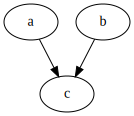

In [60]:
dot = Digraph()
for n in new.as_graph_def().node:
    dot.node(n.name,label=n.name)
    for i  in n.input:
        dot.edge(i,n.name)
dot